# Example of timeseries

In [1]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric

Importing plotly failed. Interactive plots will not work.


In [2]:
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Skapa en DataFrame med en datumkolumn och en måttkolumn
df = pd.DataFrame({
  'ds': pd.date_range(start='2023-01-01', periods=120, freq='M'),
  'y': (0.05 * np.arange(120) + np.random.normal(size=120) + [np.sin((x*np.pi)/4) for x in range(120)])
})



C:\Users\Sebastian\AppData\Local\Temp\ipykernel_3512\2081708946.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'ds': pd.date_range(start='2023-01-01', periods=120, freq='M'),


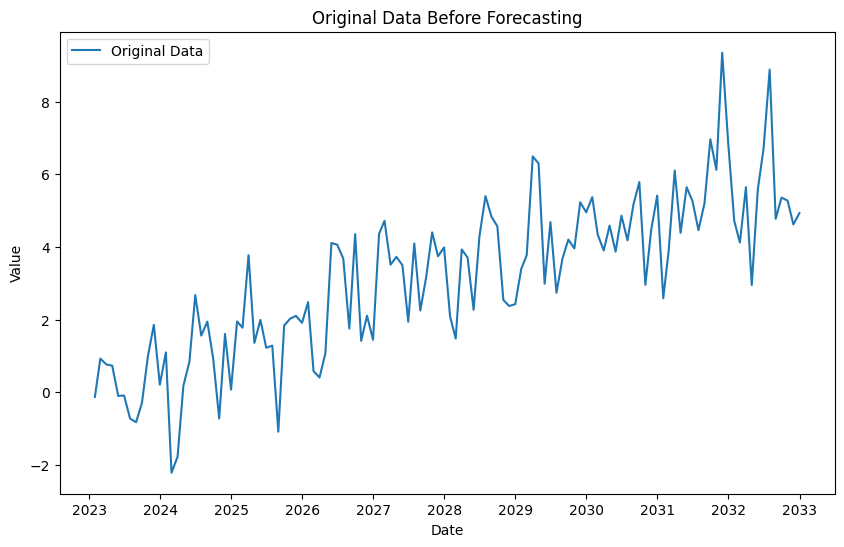

In [4]:
# Plotta de ursprungliga datan
plt.figure(figsize=(10, 6))
plt.plot(df['ds'], df['y'], label='Original Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Original Data Before Forecasting')
plt.legend()
plt.show()

10:34:38 - cmdstanpy - INFO - Chain [1] start processing
10:34:39 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Sebastian\Systementor\TH_PYAI23\Maskininlärning_och_Deep_Learning\Lektioner\venv\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


            ds      yhat  yhat_lower  yhat_upper
139 2034-08-31  6.690963    5.212978    8.073016
140 2034-09-30  7.756267    6.275764    9.274539
141 2034-10-31  7.047313    5.634732    8.511538
142 2034-11-30  7.931526    6.534145    9.401699
143 2034-12-31  7.238611    5.741616    8.698583


c:\Users\Sebastian\Systementor\TH_PYAI23\Maskininlärning_och_Deep_Learning\Lektioner\venv\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\Sebastian\Systementor\TH_PYAI23\Maskininlärning_och_Deep_Learning\Lektioner\venv\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


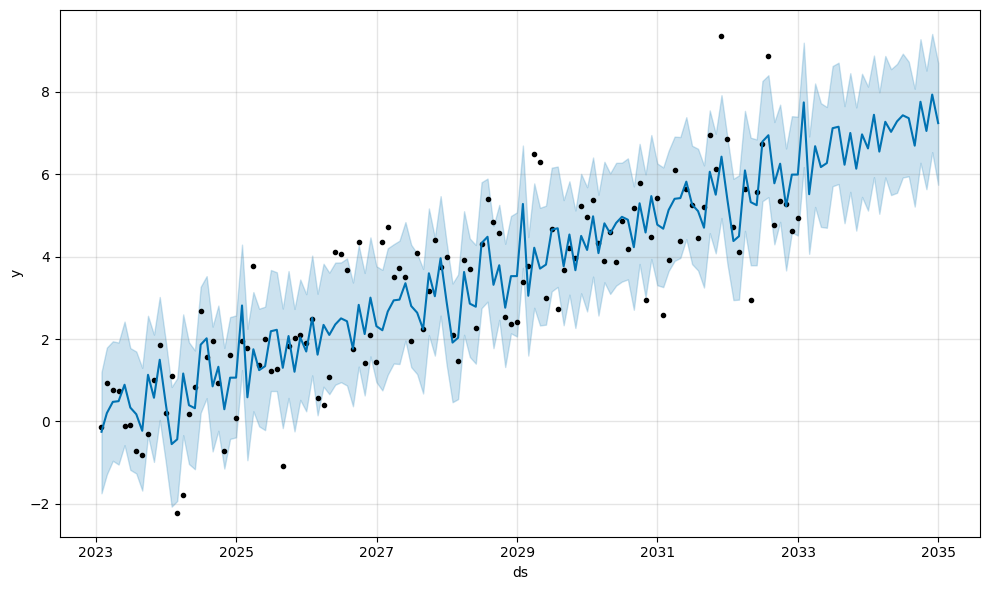

In [5]:
# Initiera och träna modellen
model = Prophet()
model.fit(df)

# Skapa en framtida dataframe för prognoser
future = model.make_future_dataframe(periods=24, freq='M')

# Göra prognosen
forecast = model.predict(future)

# Visa resultatet
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# Du kan också plotta prognoserna om du har matplotlib installerat
model.plot(forecast)
import matplotlib.pyplot as plt
plt.show()

In [6]:
print(forecast.columns)

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')


## Fake model

C:\Users\Sebastian\AppData\Local\Temp\ipykernel_3512\3320371627.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'ds': pd.date_range(start='2020-01-01', periods=60, freq='M'),
10:34:43 - cmdstanpy - INFO - Chain [1] start processing
10:34:45 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Sebastian\Systementor\TH_PYAI23\Maskininlärning_och_Deep_Learning\Lektioner\venv\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
c:\Users\Sebastian\Systementor\TH_PYAI23\Maskininlärning_och_Deep_Learning\Lektioner\venv\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt

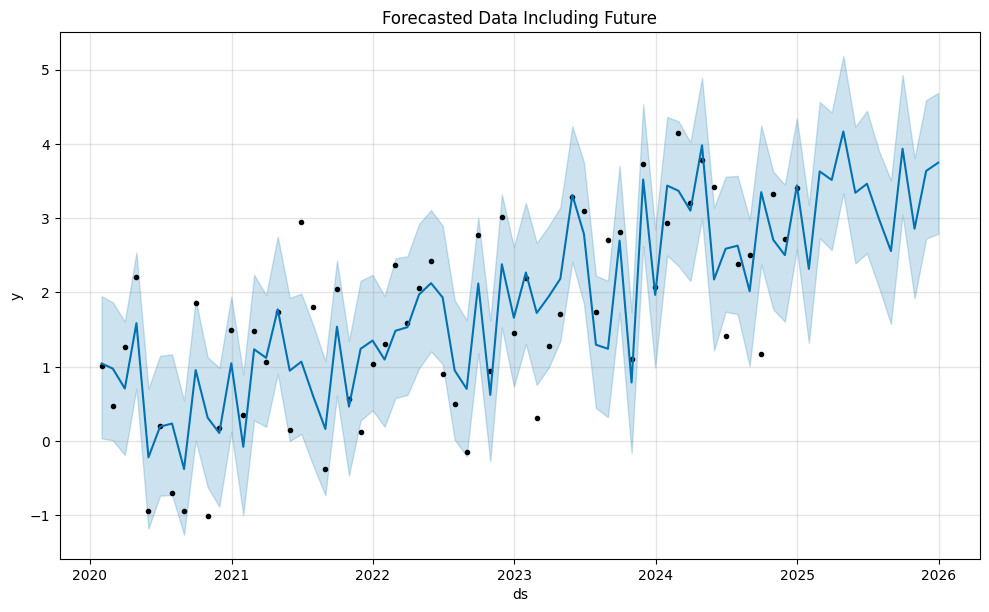

In [7]:
# Skapa en DataFrame med en datumkolumn och en måttkolumn
df = pd.DataFrame({
  'ds': pd.date_range(start='2020-01-01', periods=60, freq='M'),
  'y': (0.05 * np.arange(60) + np.random.normal(size=60) + [0.5*np.sin((x*np.pi)/4) for x in range(60)])
})

# Initiera och träna modellen på hela datasetet
model = Prophet()
model.fit(df)

# Skapa en framtida dataframe för prognoser
future = model.make_future_dataframe(periods=12, freq='M')

# Göra prognosen
forecast = model.predict(future)

# Plotta prognoserna
fig = model.plot(forecast)
plt.title('Forecasted Data Including Future')
plt.show()



  0%|          | 0/4 [00:00<?, ?it/s]

10:34:48 - cmdstanpy - INFO - Chain [1] start processing
10:34:49 - cmdstanpy - INFO - Chain [1] done processing
10:34:50 - cmdstanpy - INFO - Chain [1] start processing
10:34:50 - cmdstanpy - INFO - Chain [1] done processing
10:34:51 - cmdstanpy - INFO - Chain [1] start processing
10:34:51 - cmdstanpy - INFO - Chain [1] done processing
10:34:51 - cmdstanpy - INFO - Chain [1] start processing
10:34:52 - cmdstanpy - INFO - Chain [1] done processing


  horizon       mse      rmse       mae      mape     mdape     smape  \
0 30 days  2.230475  1.493478  1.071578  1.591581  0.244818  0.519734   
1 52 days  0.248996  0.498995  0.450978  0.773345  0.244818  0.425606   
2 53 days  2.337414  1.528860  1.110219  3.046458  1.380414  0.807981   
3 57 days  4.551733  2.133479  1.767749  3.270344  1.795283  1.248724   
4 59 days  4.606881  2.146364  1.799179  3.257538  1.795283  1.251615   

   coverage  
0      0.50  
1      0.75  
2      0.50  
3      0.25  
4      0.25  


c:\Users\Sebastian\Systementor\TH_PYAI23\Maskininlärning_och_Deep_Learning\Lektioner\venv\Lib\site-packages\prophet\plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
c:\Users\Sebastian\Systementor\TH_PYAI23\Maskininlärning_och_Deep_Learning\Lektioner\venv\Lib\site-packages\prophet\plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
c:\Users\Sebastian\Systementor\TH_PYAI23\Maskininlärning_och_Deep_Learning\Lektioner\venv\Lib\site-packages\prophet\plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df

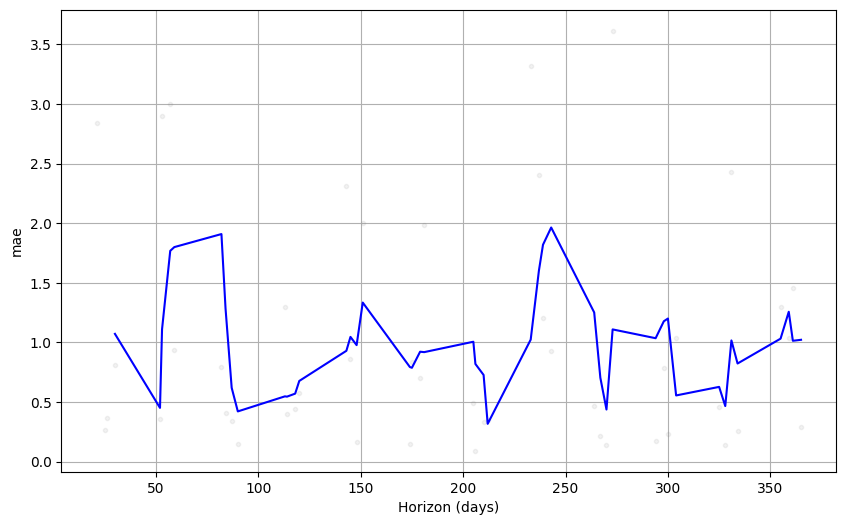

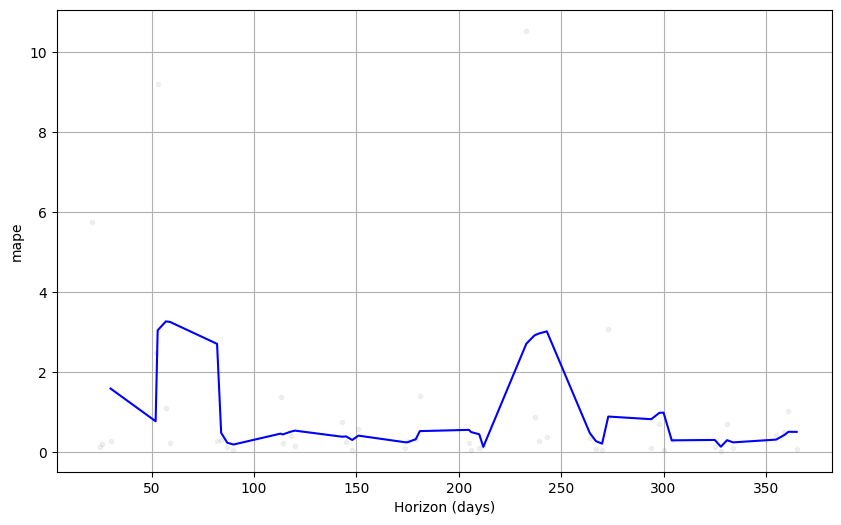

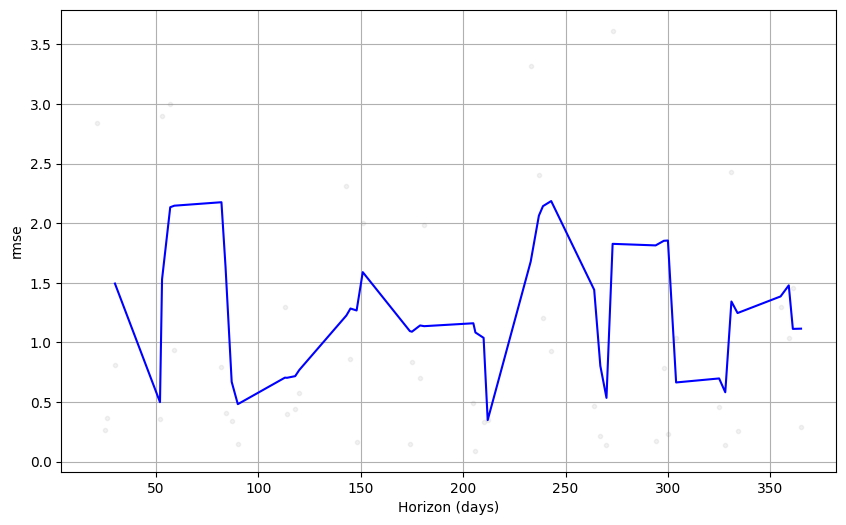

In [8]:
# Genomföra korsvalidering
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')

# Beräkna prestandametrikerna
df_p = performance_metrics(df_cv)
print(df_p.head())

# Plotta några prestandametrikerna
fig = plot_cross_validation_metric(df_cv, metric='mae')
fig2 = plot_cross_validation_metric(df_cv, metric='mape')
fig3 = plot_cross_validation_metric(df_cv, metric='rmse')
plt.show()

In [9]:
# Parameterområden att prova
param_grid = { 
    'yearly_seasonality': [True, False],
    'changepoint_prior_scale': [0.01, 0.1, 0.5]
}

# Skapa alla kombinationer av parametrar
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # För att lagra rotmedelkvadratavvikelsen för varje modell

# Loopa över alla parametrarkombinationer
for params in all_params:
    m = Prophet(**params).fit(df)  # Träna modellen med givna parametrar
    df_cv = cross_validation(m, initial='730 days', period='180 days', horizon='365 days')
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Hitta bästa parametrarna
best_params = all_params[rmses.index(min(rmses))]
print('Bästa parametrarna:', best_params)

10:34:54 - cmdstanpy - INFO - Chain [1] start processing
10:34:55 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/4 [00:00<?, ?it/s]

10:34:55 - cmdstanpy - INFO - Chain [1] start processing
10:34:56 - cmdstanpy - INFO - Chain [1] done processing
10:34:56 - cmdstanpy - INFO - Chain [1] start processing
10:34:57 - cmdstanpy - INFO - Chain [1] done processing
10:34:57 - cmdstanpy - INFO - Chain [1] start processing
10:34:58 - cmdstanpy - INFO - Chain [1] done processing
10:34:58 - cmdstanpy - INFO - Chain [1] start processing
10:34:58 - cmdstanpy - INFO - Chain [1] done processing
10:34:59 - cmdstanpy - INFO - Chain [1] start processing
10:35:00 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/4 [00:00<?, ?it/s]

10:35:00 - cmdstanpy - INFO - Chain [1] start processing
10:35:01 - cmdstanpy - INFO - Chain [1] done processing
10:35:02 - cmdstanpy - INFO - Chain [1] start processing
10:35:03 - cmdstanpy - INFO - Chain [1] done processing
10:35:04 - cmdstanpy - INFO - Chain [1] start processing
10:35:04 - cmdstanpy - INFO - Chain [1] done processing
10:35:05 - cmdstanpy - INFO - Chain [1] start processing
10:35:05 - cmdstanpy - INFO - Chain [1] done processing
10:35:06 - cmdstanpy - INFO - Chain [1] start processing
10:35:08 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/4 [00:00<?, ?it/s]

10:35:08 - cmdstanpy - INFO - Chain [1] start processing
10:35:11 - cmdstanpy - INFO - Chain [1] done processing
10:35:11 - cmdstanpy - INFO - Chain [1] start processing
10:35:12 - cmdstanpy - INFO - Chain [1] done processing
10:35:12 - cmdstanpy - INFO - Chain [1] start processing
10:35:13 - cmdstanpy - INFO - Chain [1] done processing
10:35:13 - cmdstanpy - INFO - Chain [1] start processing
10:35:15 - cmdstanpy - INFO - Chain [1] done processing
10:35:16 - cmdstanpy - INFO - Chain [1] start processing
10:35:16 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/4 [00:00<?, ?it/s]

10:35:17 - cmdstanpy - INFO - Chain [1] start processing
10:35:18 - cmdstanpy - INFO - Chain [1] done processing
10:35:18 - cmdstanpy - INFO - Chain [1] start processing
10:35:18 - cmdstanpy - INFO - Chain [1] done processing
10:35:19 - cmdstanpy - INFO - Chain [1] start processing
10:35:20 - cmdstanpy - INFO - Chain [1] done processing
10:35:20 - cmdstanpy - INFO - Chain [1] start processing
10:35:20 - cmdstanpy - INFO - Chain [1] done processing
10:35:21 - cmdstanpy - INFO - Chain [1] start processing
10:35:21 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/4 [00:00<?, ?it/s]

10:35:22 - cmdstanpy - INFO - Chain [1] start processing
10:35:22 - cmdstanpy - INFO - Chain [1] done processing
10:35:23 - cmdstanpy - INFO - Chain [1] start processing
10:35:23 - cmdstanpy - INFO - Chain [1] done processing
10:35:24 - cmdstanpy - INFO - Chain [1] start processing
10:35:24 - cmdstanpy - INFO - Chain [1] done processing
10:35:25 - cmdstanpy - INFO - Chain [1] start processing
10:35:25 - cmdstanpy - INFO - Chain [1] done processing
10:35:26 - cmdstanpy - INFO - Chain [1] start processing
10:35:26 - cmdstanpy - INFO - Chain [1] done processing


  0%|          | 0/4 [00:00<?, ?it/s]

10:35:27 - cmdstanpy - INFO - Chain [1] start processing
10:35:27 - cmdstanpy - INFO - Chain [1] done processing
10:35:28 - cmdstanpy - INFO - Chain [1] start processing
10:35:28 - cmdstanpy - INFO - Chain [1] done processing
10:35:29 - cmdstanpy - INFO - Chain [1] start processing
10:35:29 - cmdstanpy - INFO - Chain [1] done processing
10:35:29 - cmdstanpy - INFO - Chain [1] start processing
10:35:30 - cmdstanpy - INFO - Chain [1] done processing


Bästa parametrarna: {'yearly_seasonality': False, 'changepoint_prior_scale': 0.5}


C:\Users\Sebastian\AppData\Local\Temp\ipykernel_3512\63124435.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'ds': pd.date_range(start='2020-01-01', periods=60, freq='M'),
10:35:31 - cmdstanpy - INFO - Chain [1] start processing
10:35:32 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\Sebastian\Systementor\TH_PYAI23\Maskininlärning_och_Deep_Learning\Lektioner\venv\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(
c:\Users\Sebastian\Systementor\TH_PYAI23\Maskininlärning_och_Deep_Learning\Lektioner\venv\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.t

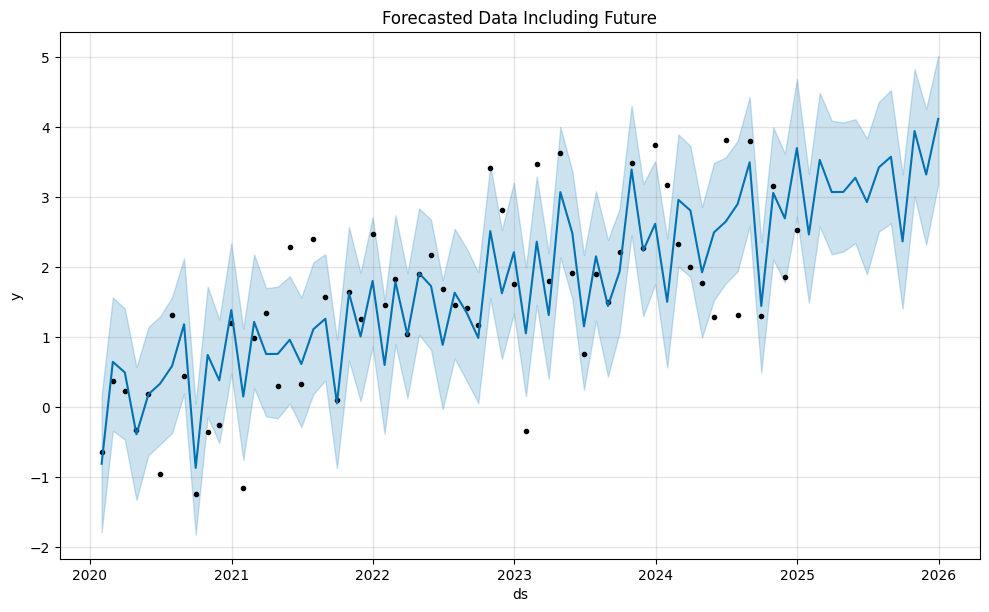

c:\Users\Sebastian\Systementor\TH_PYAI23\Maskininlärning_och_Deep_Learning\Lektioner\venv\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\Sebastian\Systementor\TH_PYAI23\Maskininlärning_och_Deep_Learning\Lektioner\venv\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\Sebastian\Systementor\TH_PYAI23\Maskininlärning_och_Deep_Learning\Lektioner\venv\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behav

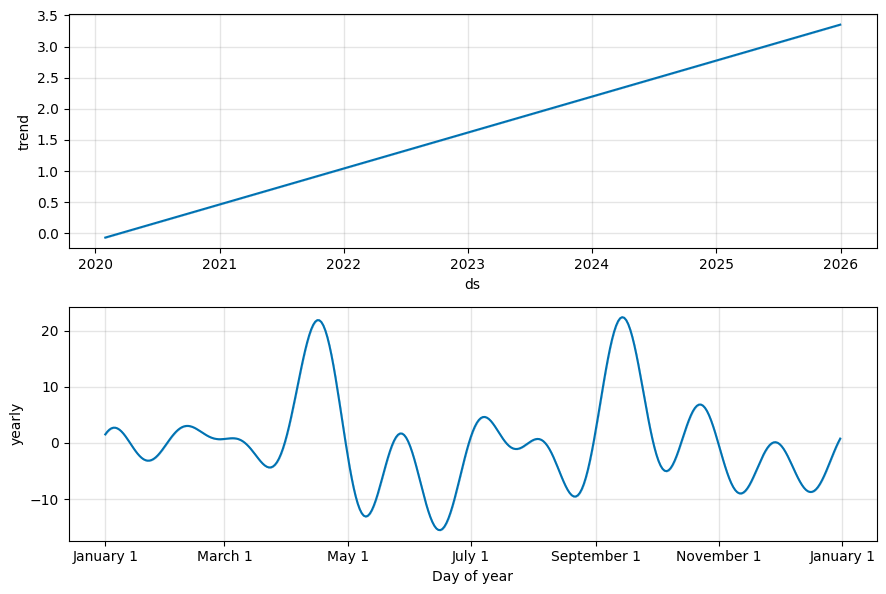

In [10]:
# Skapa en DataFrame med en datumkolumn och en måttkolumn
df = pd.DataFrame({
    'ds': pd.date_range(start='2020-01-01', periods=60, freq='M'),
    'y': (0.05 * np.arange(60) + np.random.normal(size=60))
})

# Initiera och träna modellen
model = Prophet(yearly_seasonality=True)
model.fit(df)

# Skapa en framtida dataframe för prognoser
future = model.make_future_dataframe(periods=12, freq='M')

# Göra prognosen
forecast = model.predict(future)

# Plotta resultatet inklusive komponenterna
fig = model.plot(forecast)
plt.title('Forecasted Data Including Future')
plt.show()

# Plotta komponenterna separat
fig = model.plot_components(forecast)
plt.show()